In [1]:
%load_ext autoreload
%autoreload 2

from ml.preprocessing import DataPreprocessor

import warnings

import pandas as pd

pd.options.display.max_columns, pd.options.display.max_rows = 5000, 500
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings("ignore")

/Users/victorialokteva/LLMtesttask/venv/lib/python3.11/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_paths" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
data = DataPreprocessor().preprocessing()

In [3]:
data.head()

,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,site_id,tag,domain,site_category,year,month,hour,week_day,click
0,00000000-0000-0001-6268-957597321099,0,7,6,517,Android,SM-N960U,Mobile Phone,dotesports.com,vcontent,com,sport,2021,7,19,Wednesday,False
1,00000000-0000-0001-6268-957946481763,0,7,6,505,Android,Pixel 4a,Mobile Phone,online.seterra.com,vregistration,com,other,2021,7,19,Wednesday,False
2,00000000-0000-0001-6268-958052831367,0,7,6,501,iOS,iPhone,Mobile Phone,hiphopdx.com,vregistration,com,other,2021,7,19,Wednesday,False
3,00000000-0000-0001-6268-958153731939,0,7,6,517,Android,SM-G991U,Mobile Phone,vivaelbirdos.com,vregistration,com,other,2021,7,19,Wednesday,False
4,00000000-0000-0001-6268-959263331420,0,7,6,517,Android,SM-N975U,Mobile Phone,landgrantholyland.com,vregistration,com,other,2021,7,19,Wednesday,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            9583 non-null   object
 1   fc_imp_chk     9583 non-null   int64 
 2   fc_time_chk    9583 non-null   int64 
 3   utmtr          9583 non-null   int64 
 4   mm_dma         9583 non-null   int64 
 5   osName         9583 non-null   object
 6   model          9583 non-null   object
 7   hardware       9583 non-null   object
 8   site_id        9583 non-null   object
 9   tag            9583 non-null   object
 10  domain         9583 non-null   object
 11  site_category  9583 non-null   object
 12  year           9583 non-null   int32 
 13  month          9583 non-null   int32 
 14  hour           9583 non-null   int32 
 15  week_day       9583 non-null   object
 16  click          9583 non-null   bool  
dtypes: bool(1), int32(3), int64(4), object(9)
memory usage: 1.1+ MB


In [19]:
data['site_id'].value_counts()

site_id
nypost.com                    1545
whatculture.com               1369
dailymotion.com                584
digitalspy.com                 349
myfox8.com                     327
                              ... 
wtva.com                         1
butterwithasideofbread.com       1
buzzaboutbees.net                1
inspiredbycharm.com              1
14ymedio.com                     1
Name: count, Length: 1472, dtype: int64

In [20]:
data['site_category'].value_counts()

site_category
other      9094
sport       269
cooking      69
weather      43
game         36
music        32
travel       23
health       13
zodiac        4
Name: count, dtype: int64

In [45]:
data[data['mm_dma'] == -1]

,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,site_id,tag,domain,is_sport_site,is_travel_site,is_weather_site,is_game_site,is_music_site,is_cook_site,is_health_site,is_zodiac_site,year,month,hour,week_day,click


In [46]:
# model

Train

In [36]:
from ml.train_creator import TrainCreator

train, validation = TrainCreator().transform()

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7666 entries, 1992 to 4633
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   uid            7666 non-null   object  
 1   fc_imp_chk     7666 non-null   int64   
 2   fc_time_chk    7666 non-null   int64   
 3   utmtr          7666 non-null   int64   
 4   mm_dma         7666 non-null   int64   
 5   osName         7666 non-null   category
 6   model          7666 non-null   category
 7   hardware       7666 non-null   category
 8   domain         7666 non-null   category
 9   site_category  7666 non-null   category
 10  year           7666 non-null   int32   
 11  month          7666 non-null   int32   
 12  hour           7666 non-null   int32   
 13  week_day       7666 non-null   category
 14  click          7666 non-null   bool    
dtypes: bool(1), category(6), int32(3), int64(4), object(1)
memory usage: 516.7+ KB


In [38]:
train['domain'].value_counts()

domain
com      7437
net        48
org        32
mobi       29
pl         18
gr         16
uk         15
ro         10
co          8
es          7
rs          6
tv          5
sk          5
br          3
gg          3
ph          2
au          2
do          2
ca          2
tips        1
today       1
pr          1
pro         1
tt          1
mx          1
nz          1
nl          1
ba          1
me          1
live        1
jp          1
io          1
eu          1
ec          1
vn          1
Name: count, dtype: int64

LGBM

In [14]:
from ml.click_lgbm import ClickLGBM

In [15]:
ClickLGBM().cross_val_score() # 4460574544493795

0.44796355529756215

In [42]:
ClickLGBM().save_model()

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.42049
[LightGBM] [Warning] feature_fraction is set=0.646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.646
[LightGBM] [Warning] bagging_fraction is set=0.847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.847
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. 

In [43]:
validation = ClickLGBM().validation()
validation.head()

[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.42049
[LightGBM] [Warning] bagging_fraction is set=0.847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.847
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.646
LogLoss:  0.4541134946861252
Accuracy:  0.800208659363589


,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click,prediction
0,0,7,0,527,Android,SM-G973U,Mobile Phone,com,other,2021,7,1,Monday,False,0.487
1,0,7,4,518,iOS,iPhone,Mobile Phone,com,other,2021,8,12,Tuesday,False,0.850
2,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True,0.084
3,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False,0.100
4,0,7,6,505,Android,SM-N975U,Mobile Phone,com,other,2021,7,19,Sunday,True,0.682


In [44]:
# experiments = ClickLGBM().optuna_optimization(100)

[I 2024-01-12 14:11:49,024] A new study created in memory with name: no-name-80b4b90a-fb9b-4df6-9589-66f14a8e8a0a


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-01-12 14:11:55,087] Trial 0 finished with value: 0.45892778096160364 and parameters: {'learning_rate': 0.019064, 'feature_fraction': 0.6018, 'num_leaves': 14, 'lambda_l1': 3.40361, 'lambda_l2': 8.494520000000001, 'bagging_fraction': 0.7, 'bagging_freq': 182}. Best is trial 0 with value: 0.45892778096160364.
[I 2024-01-12 14:12:05,519] Trial 1 finished with value: 0.45365898997360493 and parameters: {'learning_rate': 0.013978, 'feature_fraction': 0.6018, 'num_leaves': 27, 'lambda_l1': 2.5428300000000004, 'lambda_l2': 6.02486, 'bagging_fraction': 0.9277, 'bagging_freq': 116}. Best is trial 1 with value: 0.45365898997360493.
[I 2024-01-12 14:12:18,400] Trial 2 finished with value: 0.45345804866397926 and parameters: {'learning_rate': 0.009225, 'feature_fraction': 0.6018, 'num_leaves': 18, 'lambda_l1': 2.2494, 'lambda_l2': 9.91202, 'bagging_fraction': 0.9277, 'bagging_freq': 30}. Best is trial 2 with value: 0.45345804866397926.
[I 2024-01-12 14:12:34,772] Trial 3 finished with valu

In [46]:
# experiments.head()

,number,value,duration,bagging_fraction,bagging_freq,feature_fraction,lambda_l1,lambda_l2,learning_rate,num_leaves
81,81,0.452,0 days 00:00:17.763012,0.928,50,0.450,1.331,9.164,0.009,19
65,65,0.452,0 days 00:00:14.352926,0.928,36,0.450,1.029,8.923,0.011,19
91,91,0.452,0 days 00:00:20.980059,0.928,56,0.450,1.342,7.292,0.007,20
76,76,0.452,0 days 00:00:16.250436,0.928,50,0.450,0.735,7.666,0.009,16
67,67,0.452,0 days 00:00:17.712834,0.928,42,0.450,0.848,9.088,0.009,19


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.42049
[LightGBM] [Warning] feature_fraction is set=0.646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.646
[LightGBM] [Warning] bagging_fraction is set=0.847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.847
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. 

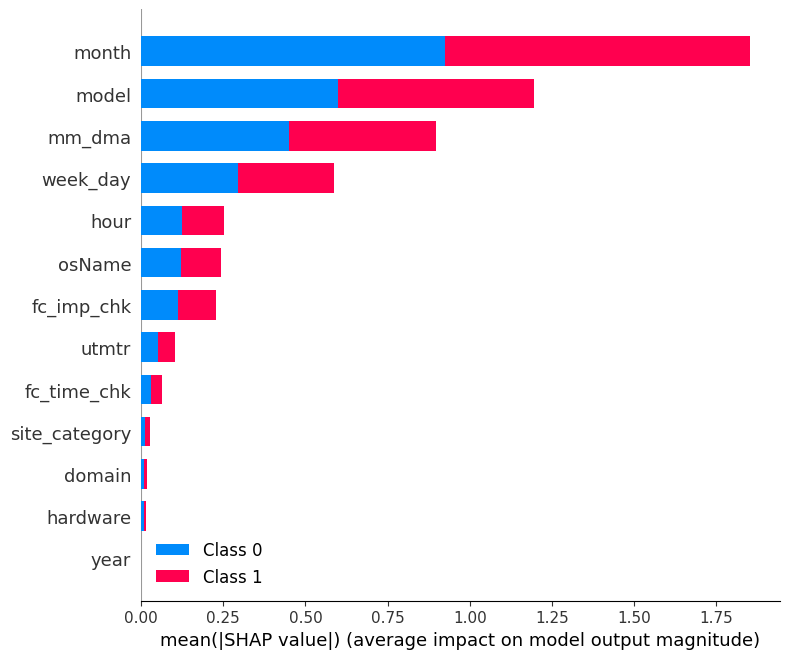

In [18]:
ClickLGBM().feature_importance(is_shap=True)

In [19]:
feature_importance = ClickLGBM().feature_importance(is_shap=False)
feature_importance

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.42049
[LightGBM] [Warning] feature_fraction is set=0.646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.646
[LightGBM] [Warning] bagging_fraction is set=0.847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.847
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.79814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.79814
[LightGBM] [Warning] lambda_l2 is set=6.42049, reg_lambda=0.0 will be ignored. 

,feature,gain
0,mm_dma,22.030
1,hour,20.827
2,model,17.637
3,week_day,14.484
4,utmtr,11.153
5,month,4.802
6,fc_imp_chk,4.756
7,osName,1.686
8,hardware,0.979
9,site_category,0.723


CatBoost

In [20]:
from ml.click_catboost import ClickCatBoost

In [48]:
ClickCatBoost().cross_val_score() # 4382027887487491

Training on fold [0/5]

bestTest = 0.4500292503
bestIteration = 403

Training on fold [1/5]

bestTest = 0.4239876666
bestIteration = 546

Training on fold [2/5]

bestTest = 0.4432427007
bestIteration = 333

Training on fold [3/5]

bestTest = 0.4507347504
bestIteration = 524

Training on fold [4/5]

bestTest = 0.4420557064
bestIteration = 488

     iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0             0              0.677             0.003               0.677   
1             1              0.667             0.006               0.666   
2             2              0.654             0.003               0.654   
3             3              0.641             0.006               0.641   
4             4              0.628             0.005               0.628   
..          ...                ...               ...                 ...   
642         642              0.443             0.011               0.342   
643         643              0.443             

0.4431129768615863

In [49]:
ClickCatBoost().save_model()

In [50]:
validation = ClickCatBoost().validation()
validation.head()

LogLoss:  0.445441827679697
Accuracy:  0.803338549817423


,index,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click
0,3264,00000000-0000-0001-6272-613604941017,0,7,0,527,Android,SM-G973U,Mobile Phone,com,other,2021,7,1,Monday,False
1,7498,00000000-0000-0001-6279-945387121616,0,7,4,518,iOS,iPhone,Mobile Phone,com,other,2021,8,12,Tuesday,False
2,5630,00000000-0000-0001-6276-627418591735,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True
3,4673,00000000-0000-0001-6274-939137071136,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False
4,3147,00000000-0000-0001-6272-400916361907,0,7,6,505,Android,SM-N975U,Mobile Phone,com,other,2021,7,19,Sunday,True


In [ ]:
# experiments = ClickCatBoost().optuna_optimization(100)

[I 2024-01-12 14:38:36,997] A new study created in memory with name: no-name-595cf28c-2a17-4ca8-bc70-d849da24a515


  0%|          | 0/100 [00:00<?, ?it/s]

Training on fold [0/5]

bestTest = 0.4451302852
bestIteration = 4719

Training on fold [1/5]

bestTest = 0.4352461915
bestIteration = 4257

Training on fold [2/5]

bestTest = 0.4608014619
bestIteration = 4477

Training on fold [3/5]

bestTest = 0.4346828537
bestIteration = 4815

Training on fold [4/5]

bestTest = 0.4456937805
bestIteration = 4157

[I 2024-01-12 14:41:12,239] Trial 0 finished with value: 0.44434407262527265 and parameters: {'learning_rate': 0.0034197178024467398, 'l2_leaf_reg': 1.9735052919106404, 'colsample_bylevel': 0.6465098045707334, 'depth': 6, 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 42, 'random_strength': 2.1004046968194428, 'subsample': 0.9663357120684926}. Best is trial 0 with value: 0.44434407262527265.
Training on fold [0/5]

bestTest = 0.4438398386
bestIteration = 839

Training on fold [1/5]

bestTest = 0.4352887211
bestIteration = 582

Training on fold [2/5]

bestTest = 0.4596439425
bestIteration = 727

Training on fold [3/5]

bestTest = 0.4343363

In [ ]:
# experiments

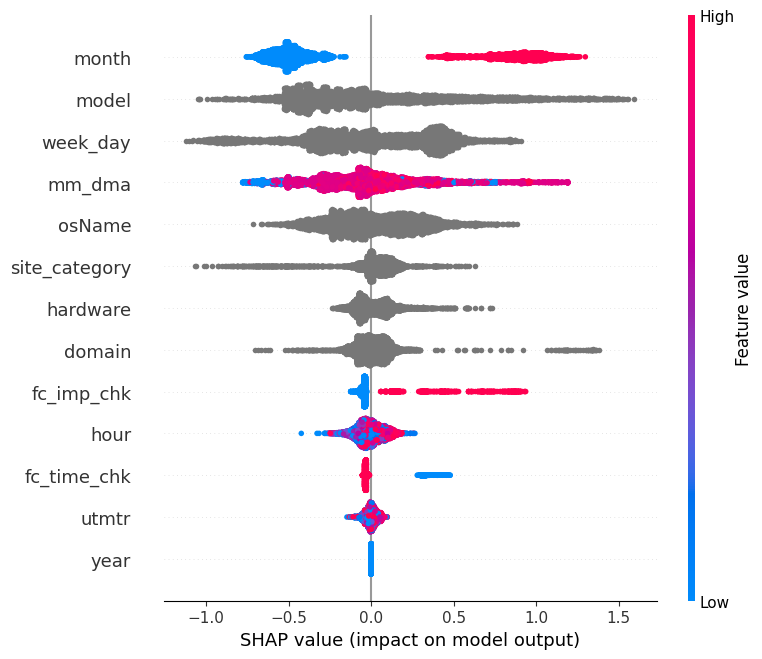

In [25]:
ClickCatBoost().feature_importance()